# Group Project of Cmpe 256
## Team Ironwall
### Shikai Jin, Zihao Gu

# Data Analysis on the Health Nutrition And Population Statistics - Method 1
### By Shikai Jin
## 1. Introduction of the data and method
Datasource: https://datacatalog.worldbank.org/dataset/health-nutrition-and-population-statistics

Health Nutrition and Population Statistics database provides key health, nutrition and population statistics gathered from a variety of international and national sources. Themes include global surgery, health financing, HIV/AIDS, immunization, infectious diseases, medical resources and usage, noncommunicable diseases, nutrition, population dynamics, reproductive health, universal health coverage, and water and sanitation. 

In this section, I tried to find the correlations between different features provided by the database and find if the Life expectancy could be predict by using the existing features in the database.

## 2. Data Preprosessing
The data could be read from the csv file downloaded through the world bank website, but since the data is organized in a specific manner and all years has been put into the header, so the dataframe got from the csv would required a lot of manipulations before they could been put into use of analysis. However, the world bank also provides API to get their data directly, so in this section I would use their API to get data that is easier to handle.

In [1]:
import seaborn as sns
import wbdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Data format

In [2]:
countries_sample = ['USA', 'GBR', 'JPN']
indicator_sample = {'NY.GNP.PCAP.CD':'GNI per Capita'}
df_sample = wbdata.get_dataframe(indicator_sample, country=countries_sample, convert_date=False)
dfu_sample = df_sample.unstack(level=0)
dfu_sample.head()

GNI per Capita                             
country          Japan United Kingdom United States
date                                               
1960               NaN            NaN           NaN
1961               NaN            NaN           NaN
1962             610.0            NaN        3280.0
1963             690.0            NaN        3410.0
1964             800.0            NaN        3610.0

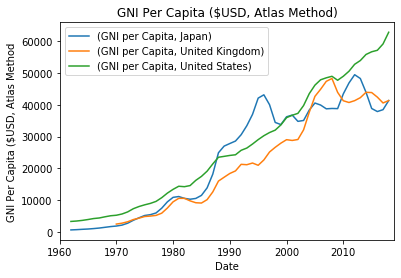

In [3]:
# a simple matplotlib plot with legend, labels and a title
dfu_sample.plot(); 
plt.legend(loc='best'); 
plt.title("GNI Per Capita ($USD, Atlas Method)"); 
plt.xlabel('Date'); plt.ylabel('GNI Per Capita ($USD, Atlas Method');


Text(0, 0.5, 'total (years)')

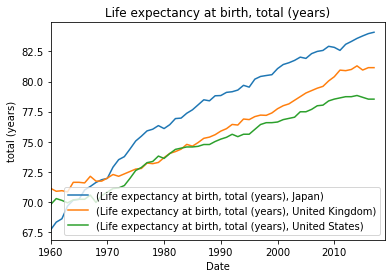

In [4]:
countries_sample = ['USA', 'GBR', 'JPN']
indicator_sample2 = {'SP.DYN.LE00.IN':'Life expectancy at birth, total (years)'}
df_sample = wbdata.get_dataframe(indicator_sample2, country=countries_sample, convert_date=False)
dfu_sample = df_sample.unstack(level=0)
dfu_sample.head()
dfu_sample.plot()
plt.legend(loc='best')
plt.title("Life expectancy at birth, total (years)") 
plt.xlabel('Date')
plt.ylabel('total (years)')


In [5]:
dfu_sample.head()

Life expectancy at birth, total (years)                             
country                                   Japan United Kingdom United States
date                                                                        
1960                                  67.666098      71.126829     69.770732
1961                                  68.310000      70.878049     70.270732
1962                                  68.594878      70.926829     70.119512
1963                                  69.658049      70.826829     69.917073
1964                                  70.132439      71.624390     70.165854

In [6]:
countries = ['ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE',
       'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU',
       'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA',
       'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI',
       'CHL', 'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV', 'HRV',
       'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FJI',
       'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB',
       'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR',
       'PRK', 'KOR', 'XKX', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS',
       'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA',
       'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL',
       'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'MNP', 'NOR',
       'OMN', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL',
       'PRT', 'PRI', 'QAT', 'ROU', 'RUS', 'RWA', 'WSM', 'SMR', 'STP',
       'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SXM', 'SVK', 'SVN',
       'SLB', 'SOM', 'ZAF', 'SSD', 'ESP', 'LKA', 'KNA', 'LCA', 'MAF',
       'VCT', 'SDN', 'SUR', 'SWE', 'CHE', 'SYR', 'TJK', 'TZA', 'THA',
       'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV',
       'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN',
       'VNM', 'VIR', 'PSE', 'YEM', 'ZMB', 'ZWE']
indicators = {'NY.GNP.PCAP.CD':'A', 'SE.PRM.ENRR':'B', 'SE.TER.ENRR':'C', 'SP.URB.TOTL.IN.ZS':'D', 'SH.STA.BASS.ZS':'E',\
               'SH.XPD.CHEX.GD.ZS':'F', 'SP.DYN.IMRT.IN':'G', 'SP.DYN.LE00.IN':'H', 'SH.STA.OWAD.ZS':'I', 'SI.POV.NAHC':'J',\
                   'SL.UEM.TOTL.ZS':'K'}

list_map = {}
for k,v in indicators.items():
    indicator = {k:v}
    df = wbdata.get_dataframe(indicator, country=countries, convert_date=False)
    dfu = df.unstack(level=0)
    data_list = []
    for col in dfu.columns:
        sub_list = dfu[col].tolist()
        data_list += sub_list
    list_map[v] = data_list

corre_df = pd.DataFrame(
    list(zip(list_map['A'], list_map['B'],list_map['C'],list_map['D'],list_map['E'],list_map['F'],list_map['G'],list_map['H'],list_map['I'],list_map['J'],list_map['K'])), \
        columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
)
corre_df

,A,B,C,D,E,F,G,H,I,J,K
0,NaN,NaN,NaN,73.611,NaN,NaN,NaN,65.055,NaN,NaN,NaN
1,NaN,NaN,NaN,74.217,NaN,NaN,NaN,65.176,NaN,NaN,NaN
2,NaN,NaN,NaN,74.767,NaN,NaN,NaN,65.269,NaN,NaN,NaN
3,NaN,NaN,NaN,75.309,NaN,NaN,NaN,65.348,NaN,NaN,NaN
4,1120.0,NaN,NaN,75.844,NaN,NaN,NaN,65.426,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12385,NaN,NaN,NaN,NaN,NaN,NaN,45.4,NaN,37.3,NaN,NaN
12386,NaN,NaN,NaN,NaN,NaN,NaN,43.1,NaN,37.7,NaN,NaN
12387,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,38.2,NaN,NaN
12388,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN


Although the dataset contains 404 indicator to show different perspectives of the data in the world, not all of them contains enough data for analyzing and evaluation conditions for that indication. The dataset contains a lot of NaN value in the whole dataset. Considering a lot of health, education and other data are chaning consistanly, and the data from country to country varis dramaticaly, it would be hard to fill them with medain value or other guess. I choose the indicators by going through the whole dataset to make sure that they would provide enough data convering more than 20 years in multiple countries. The indicators I choose are listed as follows:

(Since the name of the indicator is usually very long so I choose a letter for each indicator so that the plot and histgram would not be messy looking. A more detailed description of each indicator could be found in the HNP_StatsSeries.csv file.)

A - NY.GNP.PCAP.CD - GNI per capita, Atlas method (current US$)

B - SE.PRM.ENRR - School enrollment, primary (% gross)

C - SE.TER.ENRR - School enrollment, tertiary (% gross)

D - SP.URB.TOTL.IN.ZS - Urban population (% of total population)

E - SH.STA.BASS.ZS - People using at least basic sanitation services (% of population)

F - SH.XPD.CHEX.GD.ZS - Current health expenditure (% of GDP)

G - SP.DYN.IMRT.IN - Mortality rate, infant (per 1,000 live births)

H - SP.DYN.LE00.IN - Life expectancy at birth, total (years)

I - SH.STA.OWAD.ZS - Prevalence of overweight (% of adults)

J - SI.POV.NAHC - Poverty headcount ratio at national poverty lines (% of population)

K - SL.UEM.TOTL.ZS - Unemployment, total (% of total labor force) (modeled ILO estimate)



Even that, the data still has a lot of NaN containning in the datasets, I choose to keep the data with at least 8 valid numbers.

In [7]:
cleaned_df = corre_df.dropna(thresh=8)
cleaned_df

,A,B,C,D,E,F,G,H,I,J,K
31,3860.0,108.997391,38.119110,87.328,NaN,NaN,24.9,71.813,49.3,NaN,5.440
34,7620.0,110.970871,37.001331,87.960,NaN,NaN,22.4,72.453,51.1,NaN,11.760
38,8030.0,111.541656,46.960701,88.759,NaN,NaN,18.9,73.213,53.3,NaN,12.650
39,7580.0,114.496872,48.831718,88.952,NaN,NaN,18.2,73.396,53.9,NaN,14.050
40,7470.0,115.694130,53.964810,89.142,86.975309,8.466965,17.5,73.576,54.4,NaN,15.000
...,...,...,...,...,...,...,...,...,...,...,...
12293,1720.0,108.410900,25.191790,32.429,76.491721,6.335006,17.8,75.006,14.5,NaN,1.252
12294,1880.0,110.329600,30.715500,33.115,78.292184,5.783177,17.6,75.056,14.9,13.5,1.256
12295,1970.0,109.887000,29.073460,33.809,80.080312,5.652621,17.4,75.110,15.3,NaN,1.859
12296,2080.0,111.204900,28.544970,34.510,81.855704,5.659194,17.2,75.172,15.7,9.8,1.851


## 3. Correlation Analysis

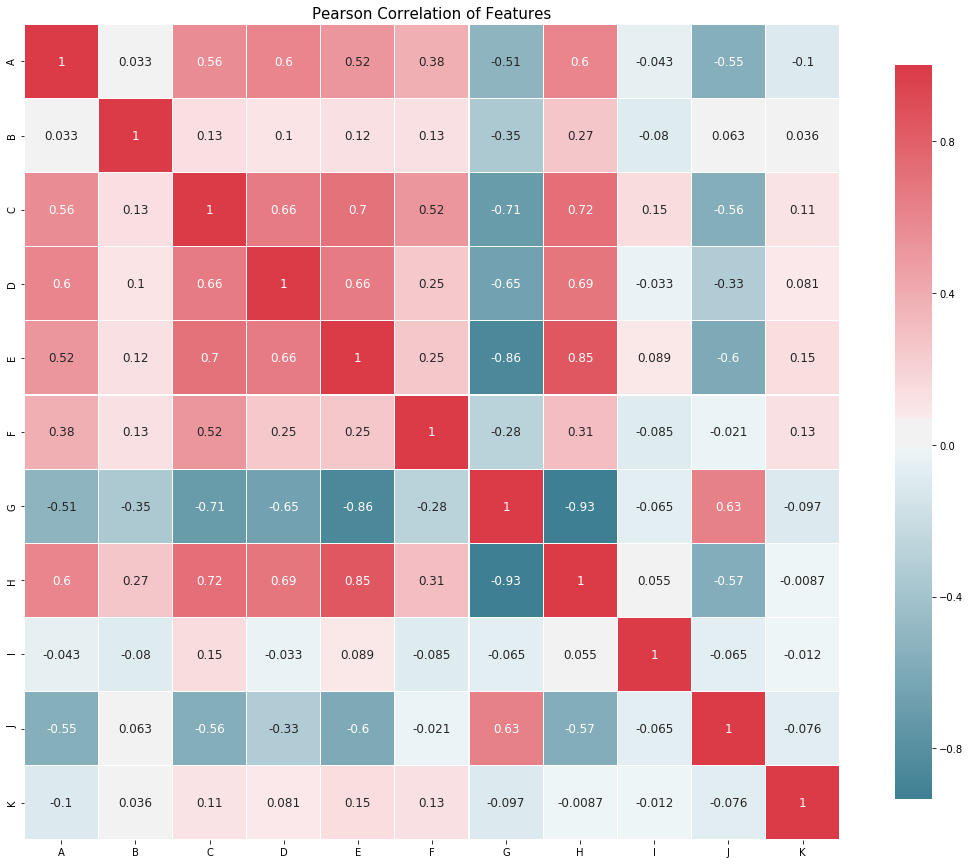

In [8]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(cleaned_df)

Made a second try after removing indicator which have a small correlation with other factors.

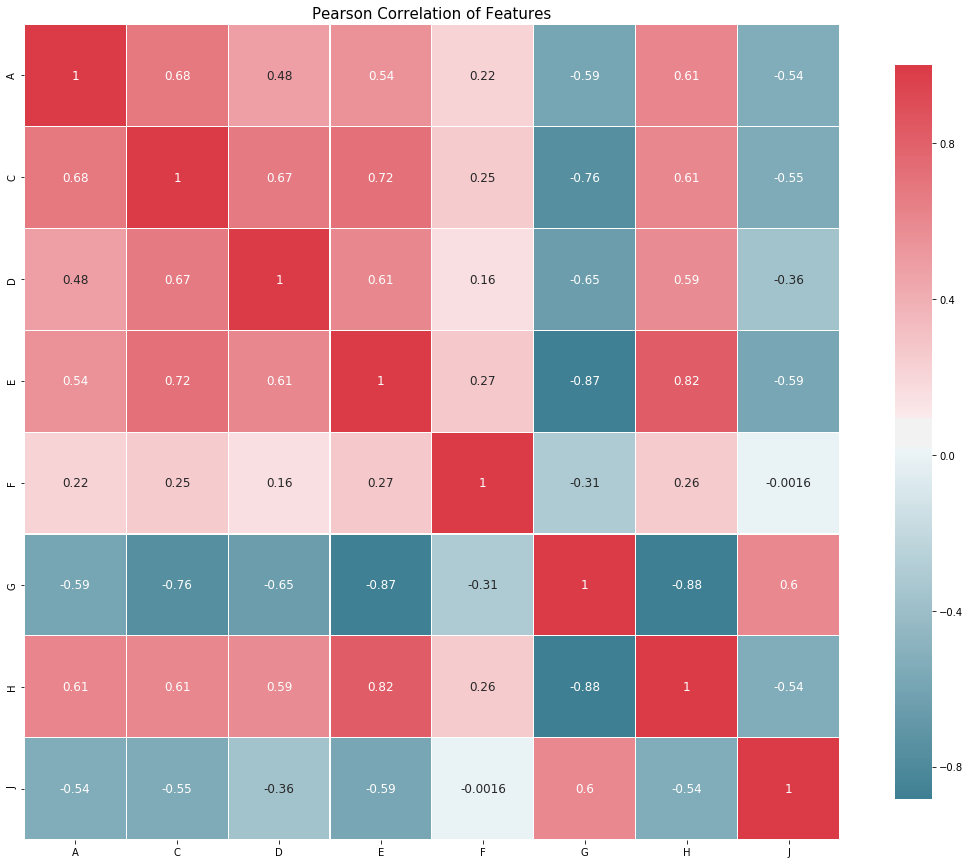

In [9]:
countries = ['ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE',
       'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU',
       'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA',
       'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI',
       'CHL', 'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV', 'HRV',
       'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FJI',
       'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB',
       'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR',
       'PRK', 'KOR', 'XKX', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS',
       'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA',
       'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL',
       'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'MNP', 'NOR',
       'OMN', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL',
       'PRT', 'PRI', 'QAT', 'ROU', 'RUS', 'RWA', 'WSM', 'SMR', 'STP',
       'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SXM', 'SVK', 'SVN',
       'SLB', 'SOM', 'ZAF', 'SSD', 'ESP', 'LKA', 'KNA', 'LCA', 'MAF',
       'VCT', 'SDN', 'SUR', 'SWE', 'CHE', 'SYR', 'TJK', 'TZA', 'THA',
       'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV',
       'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN',
       'VNM', 'VIR', 'PSE', 'YEM', 'ZMB', 'ZWE']
indicators = {'NY.GNP.PCAP.CD':'A','SE.TER.ENRR':'C', 'SP.URB.TOTL.IN.ZS':'D', 'SH.STA.BASS.ZS':'E',\
               'SH.XPD.CHEX.GD.ZS':'F', 'SP.DYN.IMRT.IN':'G', 'SP.DYN.LE00.IN':'H', 'SI.POV.NAHC':'J'}
#df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
#df1 = df.unstack(level=0)
list_map = {}
for k,v in indicators.items():
    indicator = {k:v}
    df = wbdata.get_dataframe(indicator, country=countries, convert_date=False)
    dfu = df.unstack(level=0)
    data_list = []
    for col in dfu.columns:
        sub_list = dfu[col].tolist()
        data_list += sub_list
    list_map[v] = data_list

corre_df2 = pd.DataFrame(
    list(zip(list_map['A'],list_map['C'],list_map['D'],list_map['E'],list_map['F'],list_map['G'],list_map['H'],list_map['J'])), \
        columns = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'J']
)

cleaned_df2 = corre_df2.dropna(thresh=8)
correlation_heatmap(cleaned_df2)

## 4. Linear Regression

In [10]:
X = cleaned_df2[['A','C','D','E','F','G','J']].values
y = cleaned_df2['H'].values

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
coeff_df = pd.DataFrame(regressor.coef_, ['A','C','D','E','F','G','J'],columns=['Coefficient'])  
coeff_df

,Coefficient
A,0.000320
C,-0.092503
D,0.026504
E,0.055075
F,-0.019210
G,-0.248054
J,0.013925


In [14]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

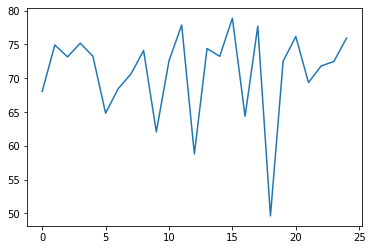

In [15]:
plt.plot(y_pred[:25])

## 5. Evaluation

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.885392720867775
Mean Squared Error: 6.395412410977004
Root Mean Squared Error: 2.5289152637004277


## 6. Reference
1. https://seaborn.pydata.org/generated/seaborn.heatmap.html
2. https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
3. https://wbdata.readthedocs.io/en/latest/
4. https://blogs.worldbank.org/opendata/accessing-world-bank-data-apis-python-r-ruby-stata

# Data Analysis on the Health Nutrition And Population Statistics - Method 2
### By Zihao Gu
## 1. Introduction of the data and method
Datasource: https://datacatalog.worldbank.org/dataset/health-nutrition-and-population-statistics

In this section, I tried to predicit the Life expectancy for a set of countries.
## 2. Data Preprosessing
I reused the data in Method 1. In this prediciton dataset,I add Canada as the fourth country. 

In [17]:
import tensorflow as tf

C:\Other\Application\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Other\Application\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Other\Application\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Other\Application\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:4

Text(0, 0.5, 'total (years)')

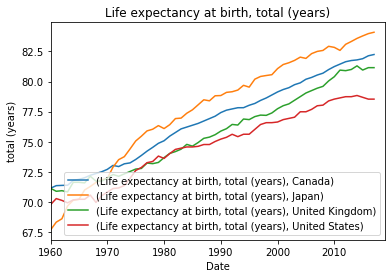

In [18]:
countries_sample = ['USA', 'GBR', 'JPN','CAN']
indicator_sample = {'SP.DYN.LE00.IN':'Life expectancy at birth, total (years)'}
df_sample = wbdata.get_dataframe(indicator_sample, country=countries_sample, convert_date=False)
dfu_sample = df_sample.unstack(level=0)
#get sample data from [Life expectancy at birth, total (years)]
countries_sample = ['USA', 'GBR', 'JPN','CAN']
indicator_sample_Life = {'SP.DYN.LE00.IN':'Life expectancy at birth, total (years)'}
df_sample_Life = wbdata.get_dataframe(indicator_sample_Life, country=countries_sample, convert_date=False)
dfu_sample_Life = df_sample_Life.unstack(level=0)
dfu_sample_Life.head()
dfu_sample_Life.plot()
plt.legend(loc='best')
plt.title("Life expectancy at birth, total (years)") 
plt.xlabel('Date')
plt.ylabel('total (years)')

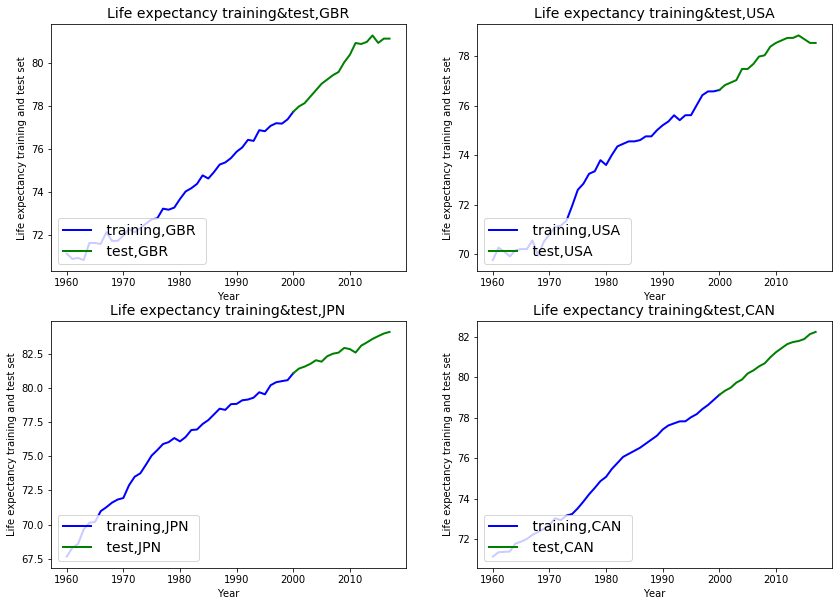

In [19]:
##put data into list
df_JPN = []
df_USA = []
df_GBR = []
df_CAN = []
for i in range(60):
    df_JPN.append(dfu_sample['Life expectancy at birth, total (years)','Japan'][i])
    df_USA.append(dfu_sample['Life expectancy at birth, total (years)','United States'][i])
    df_GBR.append(dfu_sample['Life expectancy at birth, total (years)','United Kingdom'][i])
    df_CAN.append(dfu_sample['Life expectancy at birth, total (years)','Canada'][i])
year = list(range(1960, 2020))

#show the data which is for training and which is for test
#the blue line represents the data we used for training, the green line represents the data for test and future prediciton.
#

plt.figure(figsize=(14,10))
plt.subplot(221)
plt.title("Life expectancy training&test,GBR", fontsize=14)
plt.plot(year[:-19], df_GBR[:-19], "b", linewidth=2, label=" training,GBR ")
plt.plot(year[-20:], df_GBR[-20:], "g", linewidth=2, label=" test,GBR ")
plt.legend(loc="lower left", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Life expectancy training and test set")
plt.subplot(222)
plt.title("Life expectancy training&test,USA", fontsize=14)
plt.plot(year[:-19], df_USA[:-19], "b", linewidth=2, label=" training,USA ")
plt.plot(year[-20:], df_USA[-20:], "g", linewidth=2, label=" test,USA ")
plt.legend(loc="lower left", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Life expectancy training and test set")
plt.subplot(223)
plt.title("Life expectancy training&test,JPN", fontsize=14)
plt.plot(year[:-19], df_JPN[:-19], "b", linewidth=2, label=" training,JPN ")
plt.plot(year[-20:], df_JPN[-20:], "g", linewidth=2, label=" test,JPN ")
plt.legend(loc="lower left", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Life expectancy training and test set")
plt.subplot(224)
plt.title("Life expectancy training&test,CAN", fontsize=14)
plt.plot(year[:-19], df_CAN[:-19], "b", linewidth=2, label=" training,CAN ")
plt.plot(year[-20:], df_CAN[-20:], "g", linewidth=2, label=" test,CAN ")
plt.legend(loc="lower left", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Life expectancy training and test set")
plt.show()


## 3. Build RNN model for datasetting.
In this session, I build a model with X_batch and Y_batch and treat the df_JPN as my training dataset.

In [20]:
#nessensial parameter for model. 
#n_steps is the step we go for each iteration.
#n_inputs,n_outputs is the number of data we pop or poll in each iteration. 
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1
t_min, t_max = 1960, 2020
resolution = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

def next_batch(batch_size, n_steps):
    return train[0:batch_size].reshape(-1, n_steps, 1), train[1:batch_size+1].reshape(-1, n_steps, 1)

#treat df_JPN as trainingset
year = np.linspace(t_min, t_max+5, int((t_max+5 - t_min) / resolution+1),dtype=int)
train = np.linspace(t_min, t_max, int((t_max - t_min) / resolution+1),dtype='d')
trainSet = df_JPN
for i in range(60):
    train[i] = trainSet[i]



In [21]:
#create cell
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
learning_rate = 0.001

#MSE
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [22]:
#fOR 2001 iteration, we train the batch for best mse without overfitting
#in this LSTM algorithm, we train 40 data as one batch, and then using this batch to predicit next 5 data. 
n_iterations = 2501
batch_size = 40
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 500 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./rnn_JPN") 
    
with tf.Session() as sess:                          
    saver.restore(sess, "./rnn_JPN")   
    X_new = train[0:40].reshape(-1, n_steps, n_inputs)
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    for i in range(4):
        y_pred = sess.run(outputs, feed_dict={X: y_pred})
y_pred

0 	MSE: 4964.149
500 	MSE: 0.0590495
1000 	MSE: 0.04880423
1500 	MSE: 0.045163617
2000 	MSE: 0.043350108
2500 	MSE: 0.041113544
INFO:tensorflow:Restoring parameters from ./rnn_JPN


INFO:tensorflow:Restoring parameters from ./rnn_JPN


array([[[70.11295 ],
        [70.33421 ],
        [70.89404 ],
        [71.46947 ],
        [71.30969 ],
        [72.59049 ],
        [72.81374 ],
        [72.22466 ],
        [72.556496],
        [72.34084 ],
        [73.94251 ],
        [74.868645],
        [75.06992 ],
        [76.32641 ],
        [76.48563 ],
        [76.90223 ],
        [76.882515],
        [76.9031  ],
        [76.91108 ],
        [76.94489 ]],

       [[78.36167 ],
        [78.50636 ],
        [78.97561 ],
        [79.25529 ],
        [78.66296 ],
        [79.03069 ],
        [79.537315],
        [78.74967 ],
        [79.27529 ],
        [78.755516],
        [80.36031 ],
        [80.974464],
        [80.399925],
        [80.791664],
        [80.488434],
        [80.74758 ],
        [80.80908 ],
        [81.043465],
        [81.2885  ],
        [81.33399 ]]], dtype=float32)

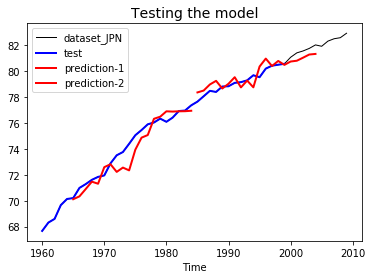

In [23]:
#Show prediciton data,conpared with the sourse data.
plt.title("Testing the model", fontsize=14)
plt.plot(year[0:50], train[0:50], "black", linewidth=1, label="dataset_JPN")
plt.plot(year[0:40], train[0:40], "b",  linewidth=2, label="test")

plt.plot(year[5:25], y_pred[0,:,0], "r", linewidth=2, label="prediction-1")
plt.plot(year[25:45], y_pred[1,:,0], "r", linewidth=2, label="prediction-2")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.show()

## 4. Prediciton of all four datasets
For now, we're going to predict all four datasets[35:55], using train[30:50]. Then we can get [50:55] as our output.

1.First, we train other three dataset to get three models for future predicition.

In [24]:
#First, put data into array for future reshape.datatype is double.
train_JPN = np.linspace(t_min, t_max-1, int((t_max - t_min) / resolution),dtype='d')
train_USA = np.linspace(t_min, t_max-1, int((t_max - t_min) / resolution),dtype='d')
train_GBR = np.linspace(t_min, t_max-1, int((t_max - t_min) / resolution),dtype='d')
train_CAN = np.linspace(t_min, t_max-1, int((t_max - t_min) / resolution),dtype='d')
for i in range(60):
    train_JPN[i] = df_JPN[i]
    train_USA[i] = df_USA[i]
    train_GBR[i] = df_GBR[i]
    train_CAN[i] = df_CAN[i]

In [28]:
#fOR 2501 iteration, we train the batch for other three countries' data, for best mse without overfitting
#in this LSTM algorithm, we train 40 data as one batch, and then using this batch to predicit next 5 data. 
n_iterations = 2501
batch_size = 40
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = train_JPN[0:batch_size].reshape(-1, n_steps, 1), train_JPN[1:batch_size+1].reshape(-1, n_steps, 1)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 500 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    saver.save(sess, "./rnn_JPN")
    
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = train_USA[0:batch_size].reshape(-1, n_steps, 1), train_USA[1:batch_size+1].reshape(-1, n_steps, 1)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 500 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    saver.save(sess, "./rnn_USA")  

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = train_GBR[0:batch_size].reshape(-1, n_steps, 1), train_GBR[1:batch_size+1].reshape(-1, n_steps, 1)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 500 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    saver.save(sess, "./rnn_GBR") 
    
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = train_CAN[0:batch_size].reshape(-1, n_steps, 1), train_CAN[1:batch_size+1].reshape(-1, n_steps, 1)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 500 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    saver.save(sess, "./rnn_CAN") 

0 	MSE: 3926.1753
500 	MSE: 0.062023915
1000 	MSE: 0.055969328
1500 	MSE: 0.053196788
2000 	MSE: 0.04812505
2500 	MSE: 0.044857346
0 	MSE: 5857.9746
500 	MSE: 0.042601284
1000 	MSE: 0.039496493
1500 	MSE: 0.039421152
2000 	MSE: 0.036281157
2500 	MSE: 0.037406534
0 	MSE: 5561.3125
500 	MSE: 0.023859072
1000 	MSE: 0.020605305
1500 	MSE: 0.017262947
2000 	MSE: 0.013603797
2500 	MSE: 0.01808715
0 	MSE: 4598.3643
500 	MSE: 0.010656951
1000 	MSE: 0.018860072
1500 	MSE: 0.013769197
2000 	MSE: 0.00887082
2500 	MSE: 0.00804268


In [29]:
#Using these four model to predict following 5 datapoint.
with tf.Session() as sess:                          
    saver.restore(sess, "./rnn_JPN")   
    X_new_JPN = train_JPN[15:55].reshape(-1, n_steps, n_inputs)
    for i in range(4):
        X_new_JPN = sess.run(outputs, feed_dict={X: X_new_JPN})
        
with tf.Session() as sess:                          
    saver.restore(sess, "./rnn_USA")   
    X_new_USA = train_USA[15:55].reshape(-1, n_steps, n_inputs)
    for i in range(4):
        X_new_USA = sess.run(outputs, feed_dict={X: X_new_USA})
        
with tf.Session() as sess:                          
    saver.restore(sess, "./rnn_GBR")   
    X_new_GBR = train_GBR[15:55].reshape(-1, n_steps, n_inputs)
    for i in range(4):
        X_new_GBR = sess.run(outputs, feed_dict={X: X_new_GBR})
        
with tf.Session() as sess:
    saver.restore(sess, "./rnn_CAN") 
    X_new_CAN = train_CAN[15:55].reshape(-1, n_steps, n_inputs)
    for i in range(4):
        X_new_CAN = sess.run(outputs, feed_dict={X: X_new_CAN})

INFO:tensorflow:Restoring parameters from ./rnn_JPN


INFO:tensorflow:Restoring parameters from ./rnn_JPN


INFO:tensorflow:Restoring parameters from ./rnn_USA


INFO:tensorflow:Restoring parameters from ./rnn_USA


INFO:tensorflow:Restoring parameters from ./rnn_GBR


INFO:tensorflow:Restoring parameters from ./rnn_GBR


INFO:tensorflow:Restoring parameters from ./rnn_CAN


INFO:tensorflow:Restoring parameters from ./rnn_CAN


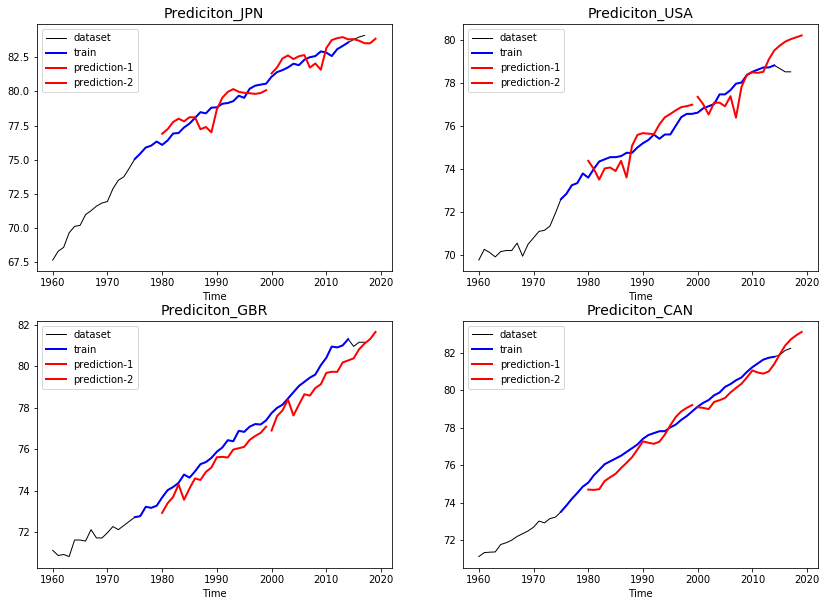

In [30]:
#show prediction of life expentancy for four countries result in 2*2 sub figure.
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.title("Prediciton_JPN", fontsize=14)
plt.plot(year[0:60], train_JPN[0:60], "black", linewidth=1, label="dataset")
plt.plot(year[15:55], train_JPN[15:55], "b",  linewidth=2, label="train")
plt.plot(year[20:40], X_new_JPN[0,:,0], "r", linewidth=2, label="prediction-1")
plt.plot(year[40:60], X_new_JPN[1,:,0], "r", linewidth=2, label="prediction-2")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.subplot(222)
plt.title("Prediciton_USA", fontsize=14)
plt.plot(year[0:60], train_USA[0:60], "black", linewidth=1, label="dataset")
plt.plot(year[15:55], train_USA[15:55], "b",  linewidth=2, label="train")
plt.plot(year[20:40], X_new_USA[0,:,0], "r", linewidth=2, label="prediction-1")
plt.plot(year[40:60], X_new_USA[1,:,0], "r", linewidth=2, label="prediction-2")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.subplot(223)
plt.title("Prediciton_GBR", fontsize=14)
plt.plot(year[0:60], train_GBR[0:60], "black", linewidth=1, label="dataset")
plt.plot(year[15:55], train_GBR[15:55], "b",  linewidth=2, label="train")
plt.plot(year[20:40], X_new_GBR[0,:,0], "r", linewidth=2, label="prediction-1")
plt.plot(year[40:60], X_new_GBR[1,:,0], "r", linewidth=2, label="prediction-2")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.subplot(224)
plt.title("Prediciton_CAN", fontsize=14)
plt.plot(year[0:60], train_CAN[0:60], "black", linewidth=1, label="dataset")
plt.plot(year[15:55], train_CAN[15:55], "b",  linewidth=2, label="train")
plt.plot(year[20:40], X_new_CAN[0,:,0], "r", linewidth=2, label="prediction-1")
plt.plot(year[40:60], X_new_CAN[1,:,0], "r", linewidth=2, label="prediction-2")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.show()

## 5.Referance
1. Géron A. Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc."; 2017 Mar 13.